In [1]:
import pandas as pd
import SquareData
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('./square_occupant_counts.csv')

In [4]:
df.index = df['Unnamed: 0']
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,...,g7,g8,h1,h2,h3,h4,h5,h6,h7,h8
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
wk,19894,17212,10391,7055,6280,4778,3471,1262,157389,42124,...,6332,2390,325945,223830,48171,19123,11887,7204,4277,1464
bk,1674,4489,5687,6420,7765,9977,16603,16080,2449,7402,...,355638,2569460,1411,3382,6290,10609,17516,49680,190523,281903
wq,11137,8057,13496,42955,11361,13247,14946,11066,17843,28594,...,11526,7500,2559,7037,27088,37565,45189,29041,14825,11054
bq,12967,17623,15299,13331,88731,15627,13034,13940,9701,25411,...,28345,4708,9295,9608,19582,39510,32007,19100,5869,3010
wr,2501273,23249,19811,17706,20735,28575,54769,19331,245964,26010,...,23111,9617,1260924,16174,26466,16710,14967,17280,25821,12251
br,21388,55616,29669,21422,17450,19726,28258,2668058,17358,54957,...,29437,124219,11543,23556,15033,15015,15701,18002,15525,1354109
wn,1834,6623,34142,47156,12090,4890,4139,5292,465881,7722,...,5117,1045,2747,33950,29202,51004,17105,7549,3903,2617
bn,3878,4424,5061,12798,51410,44173,7485,2487,1346,8756,...,21584,279401,1833,2668,6431,13754,69420,35129,29777,2522
wb,13180,26869,51969,19515,10375,14524,7906,4163,47784,330198,...,12849,3082,11886,34280,39278,56958,16704,44211,9128,2566


In [7]:
df.sum(axis=1)

Unnamed: 0
wk      6500000
bk      6500000
wq      4100824
bq      4076646
wr      9522341
br      9512308
wn      5850774
bn      5827044
wb      6713153
bb      6823875
x     278909112
wp     35757481
bp     35906442
dtype: int64

In [8]:
df.sum(axis=1)/(6500000*64)

Unnamed: 0
wk    0.015625
bk    0.015625
wq    0.009858
bq    0.009800
wr    0.022890
br    0.022866
wn    0.014064
bn    0.014007
wb    0.016137
bb    0.016404
x     0.670455
wp    0.085955
bp    0.086314
dtype: float64

In [9]:
df.sum(axis=1)/(6500000*64 - 278909112)

Unnamed: 0
wk    0.047414
bk    0.047414
wq    0.029913
bq    0.029737
wr    0.069460
br    0.069387
wn    0.042678
bn    0.042505
wb    0.048969
bb    0.049776
x     2.034483
wp    0.260830
bp    0.261917
dtype: float64

In [6]:
occurrences_dict = { square: {occupant: 0 for occupant in SquareData.occupants} for square in SquareData.squares }

In [7]:
for square in SquareData.squares:
    for occupant in SquareData.occupants:
        occurrences_dict[square][occupant] += (df[square] == occupant).sum()

In [8]:
square_occupant_counts = pd.DataFrame(occurrences_dict)
square_occupant_counts.to_csv('./square_occupant_counts.csv')

In [9]:
square_occupant_counts

,a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,...,g7,g8,h1,h2,h3,h4,h5,h6,h7,h8
wk,19894,17212,10391,7055,6280,4778,3471,1262,157389,42124,...,6332,2390,325945,223830,48171,19123,11887,7204,4277,1464
bk,1674,4489,5687,6420,7765,9977,16603,16080,2449,7402,...,355638,2569460,1411,3382,6290,10609,17516,49680,190523,281903
wq,11137,8057,13496,42955,11361,13247,14946,11066,17843,28594,...,11526,7500,2559,7037,27088,37565,45189,29041,14825,11054
bq,12967,17623,15299,13331,88731,15627,13034,13940,9701,25411,...,28345,4708,9295,9608,19582,39510,32007,19100,5869,3010
wr,2501273,23249,19811,17706,20735,28575,54769,19331,245964,26010,...,23111,9617,1260924,16174,26466,16710,14967,17280,25821,12251
br,21388,55616,29669,21422,17450,19726,28258,2668058,17358,54957,...,29437,124219,11543,23556,15033,15015,15701,18002,15525,1354109
wn,1834,6623,34142,47156,12090,4890,4139,5292,465881,7722,...,5117,1045,2747,33950,29202,51004,17105,7549,3903,2617
bn,3878,4424,5061,12798,51410,44173,7485,2487,1346,8756,...,21584,279401,1833,2668,6431,13754,69420,35129,29777,2522
wb,13180,26869,51969,19515,10375,14524,7906,4163,47784,330198,...,12849,3082,11886,34280,39278,56958,16704,44211,9128,2566
bb,4367,8172,14562,12028,16494,73025,19585,16101,3863,17249,...,927356,5330,2399,6680,28778,18839,43868,42659,22006,16765


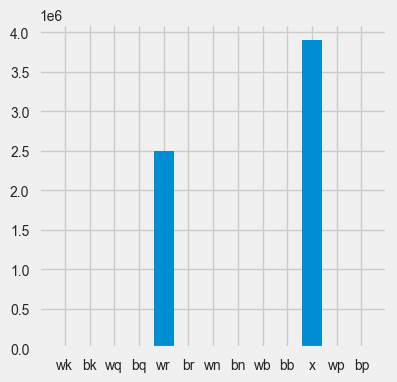

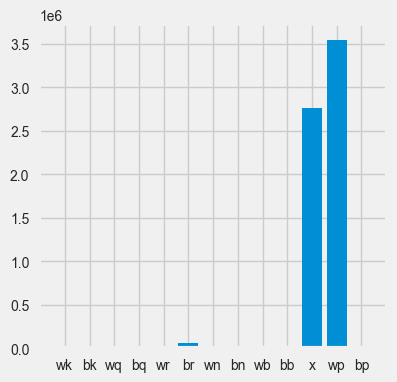

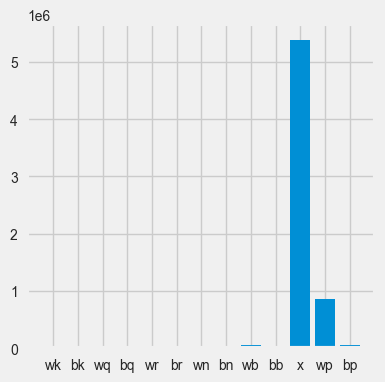

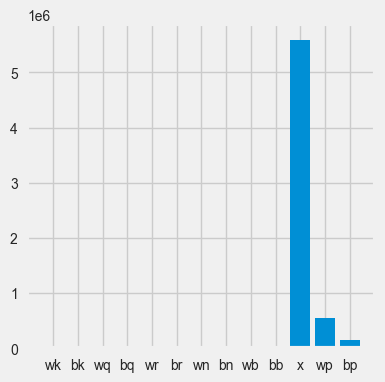

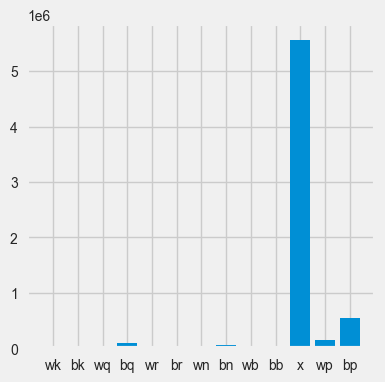

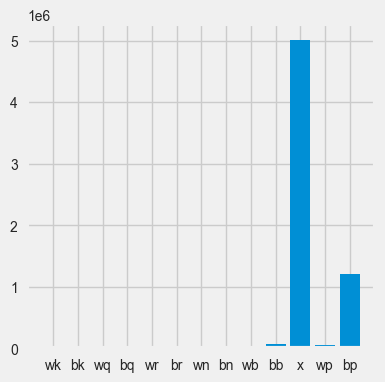

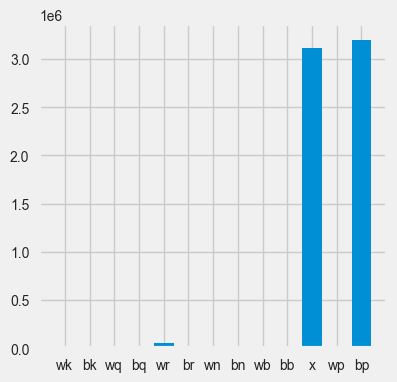

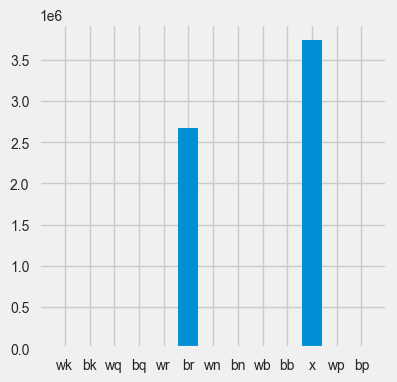

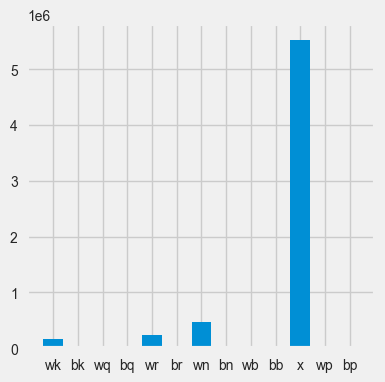

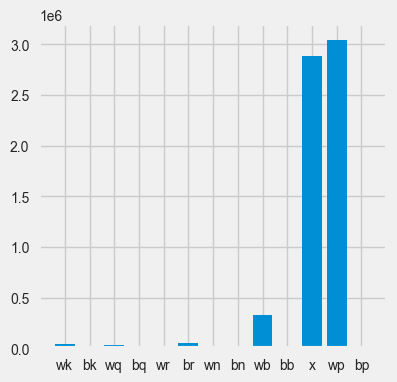

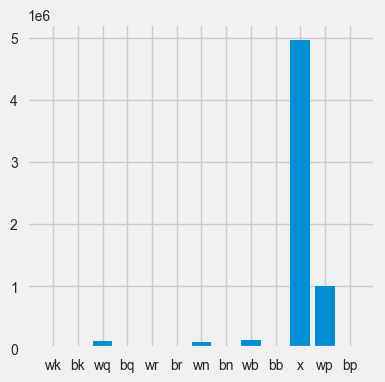

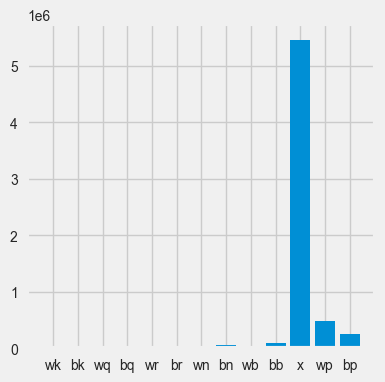

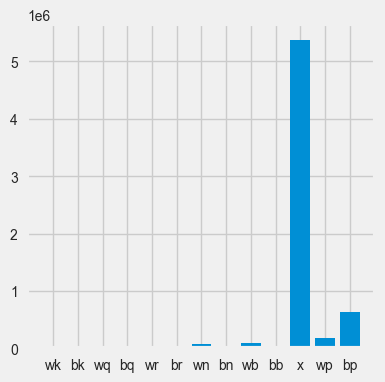

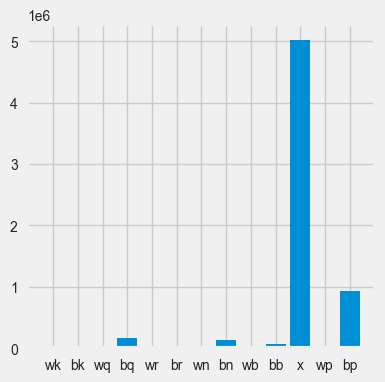

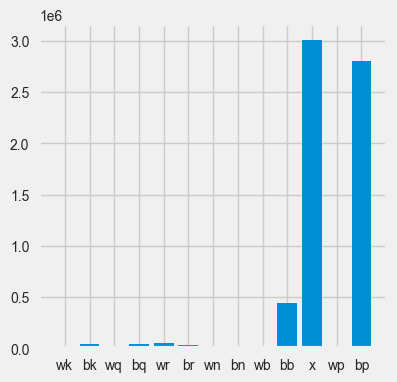

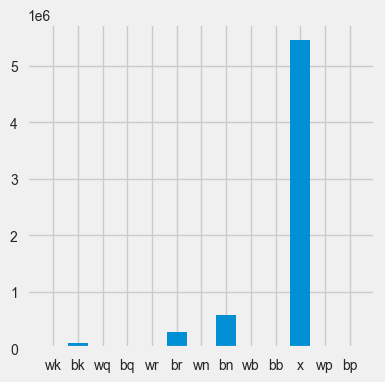

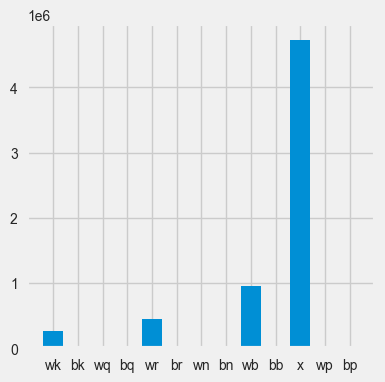

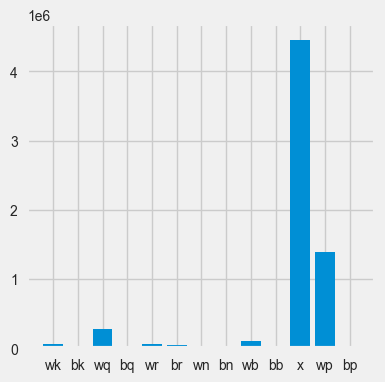

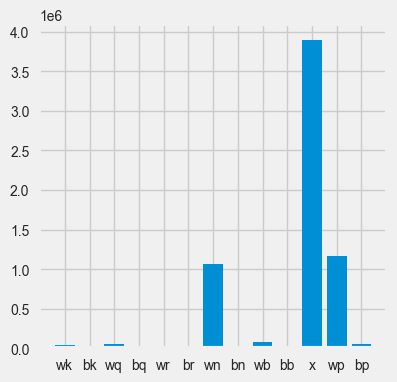

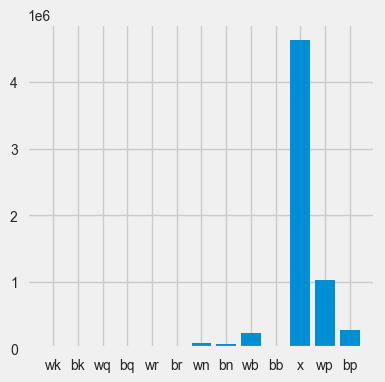

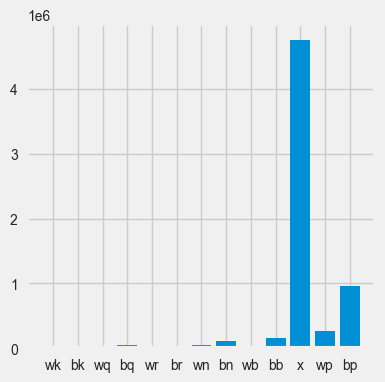

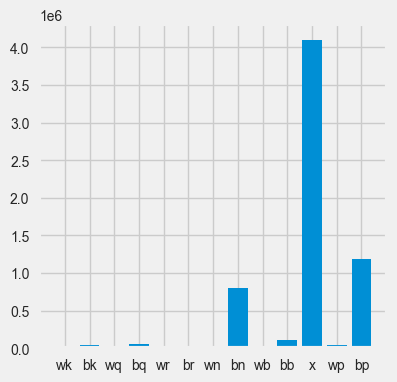

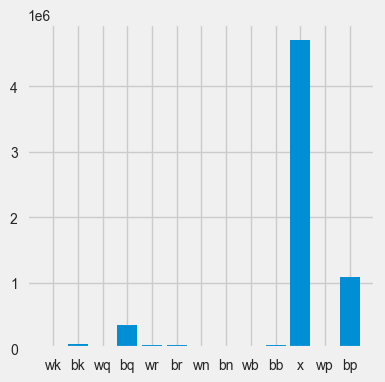

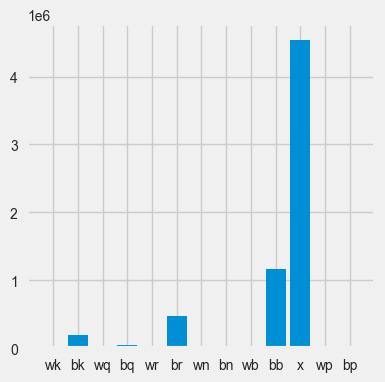

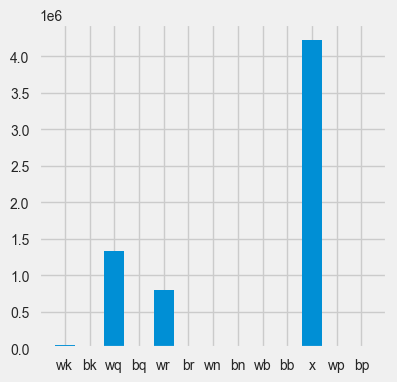

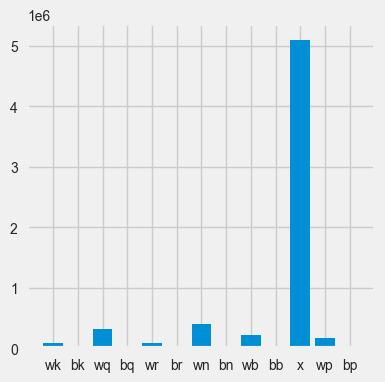

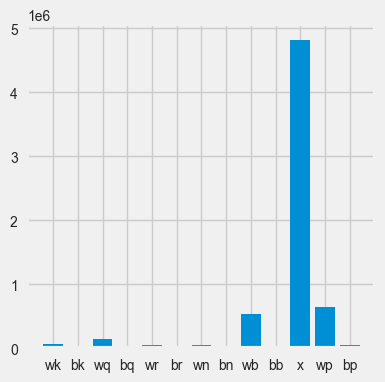

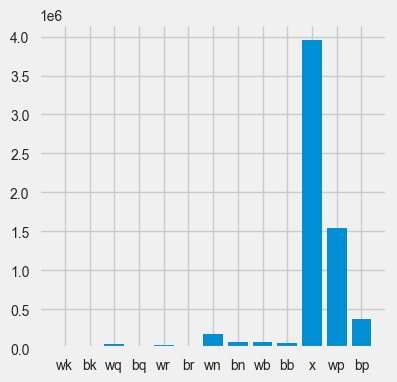

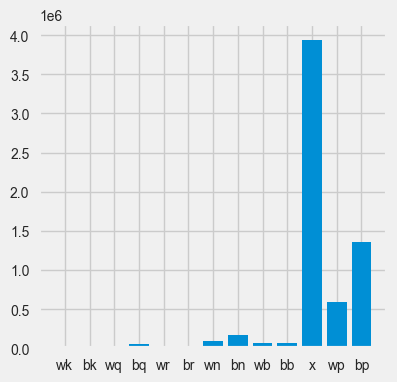

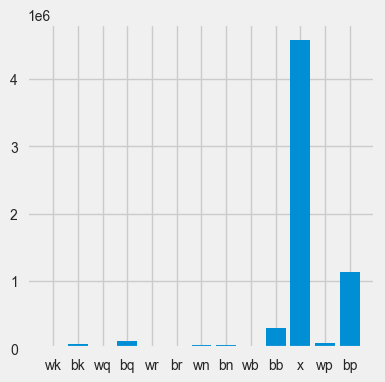

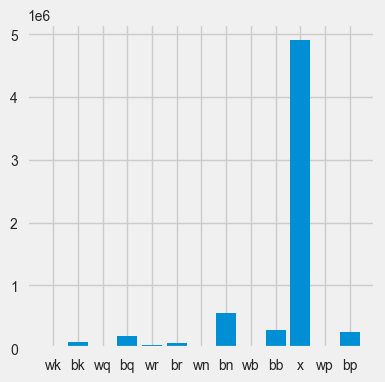

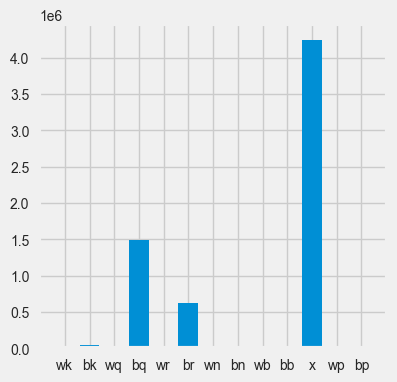

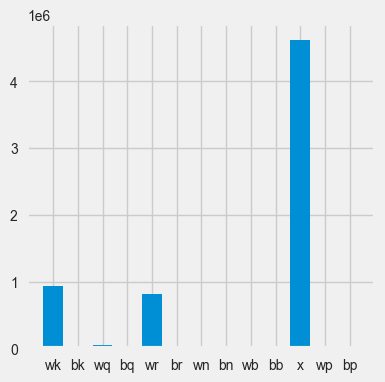

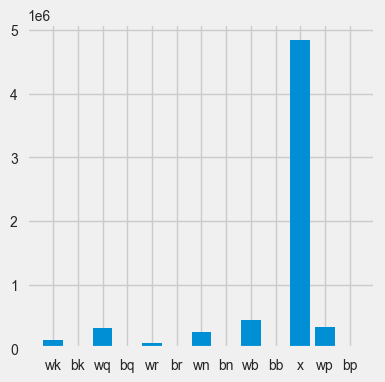

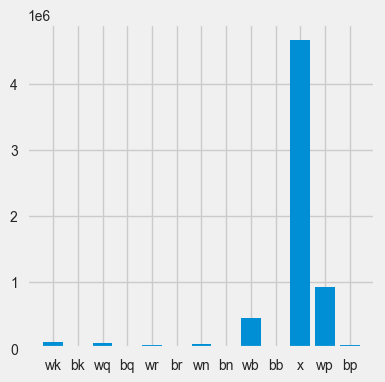

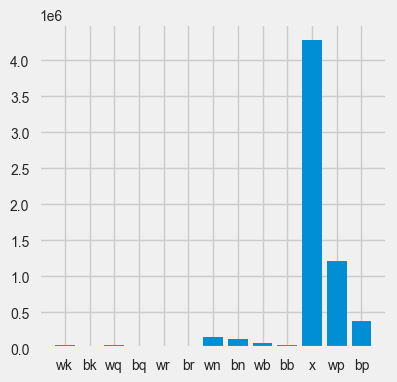

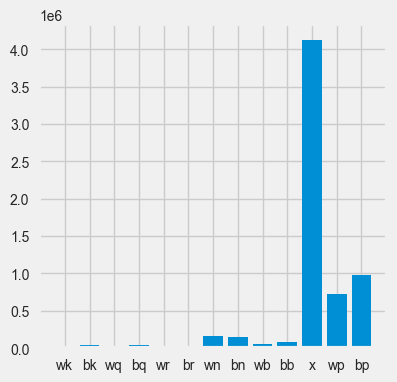

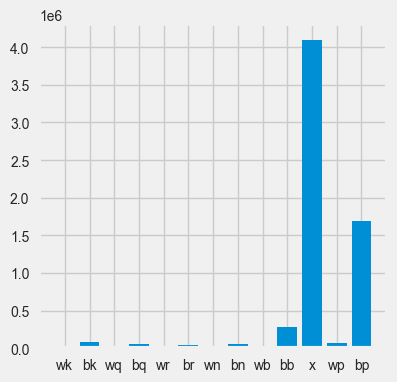

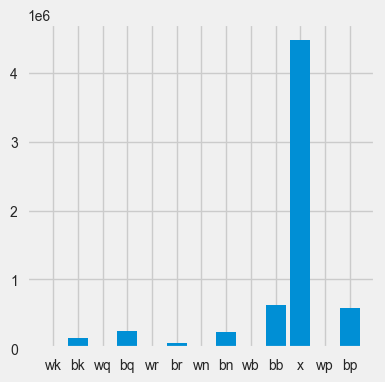

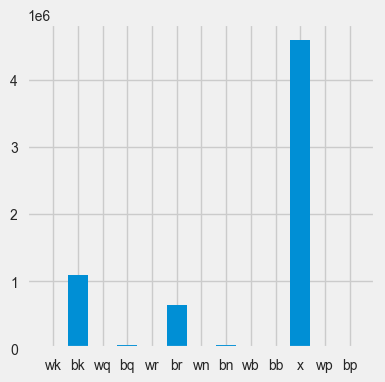

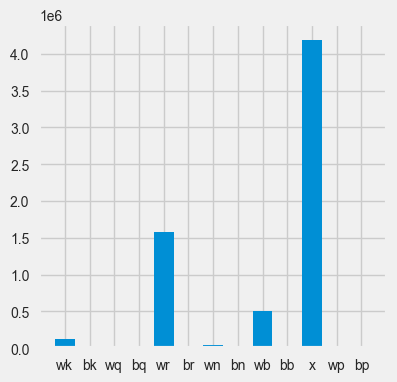

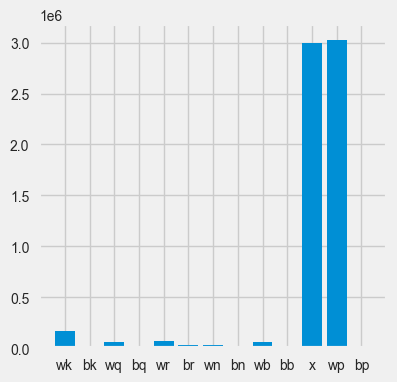

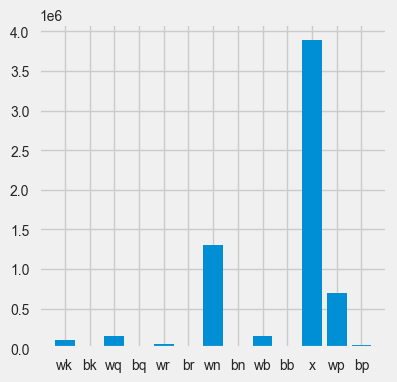

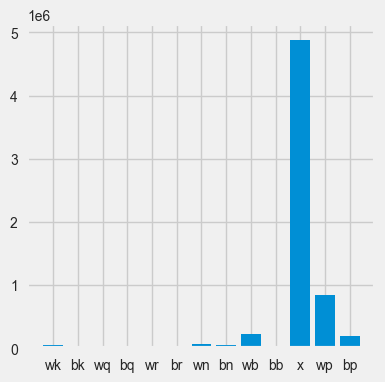

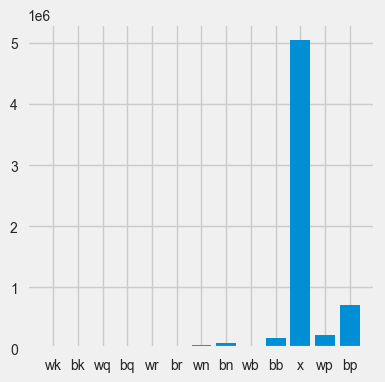

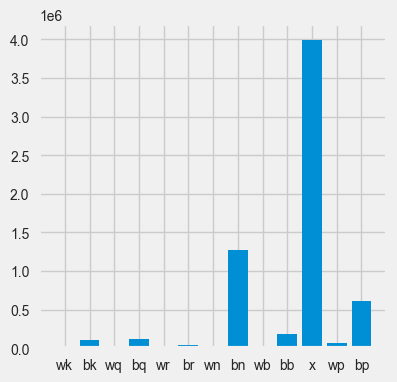

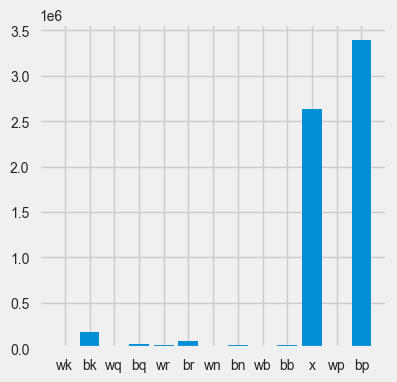

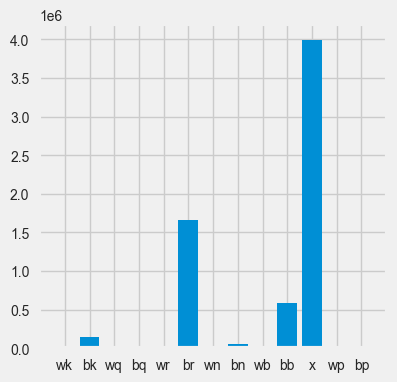

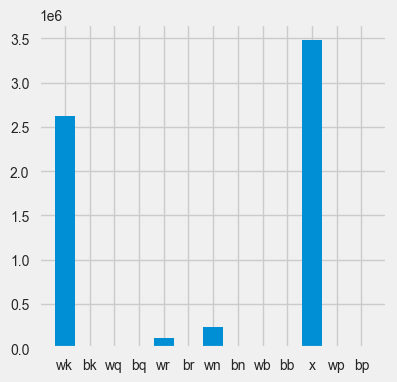

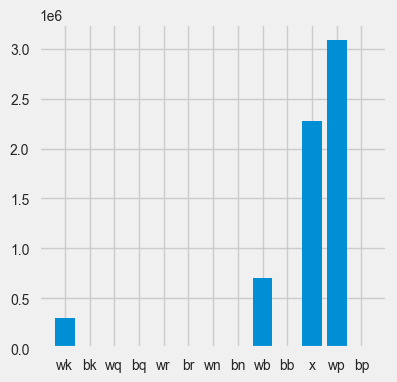

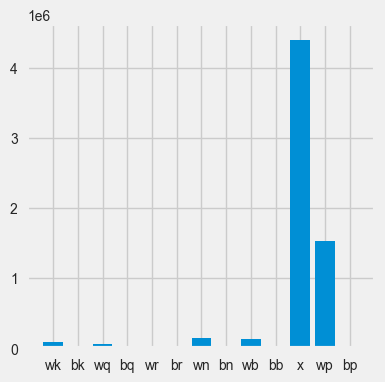

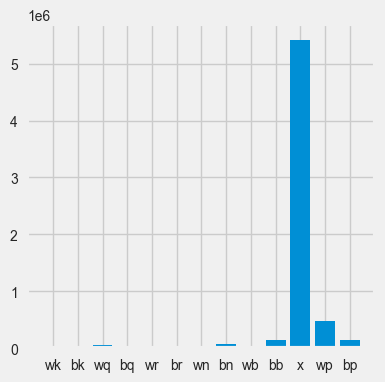

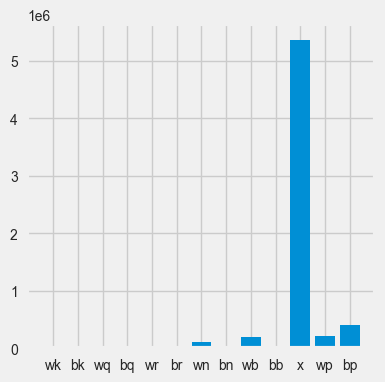

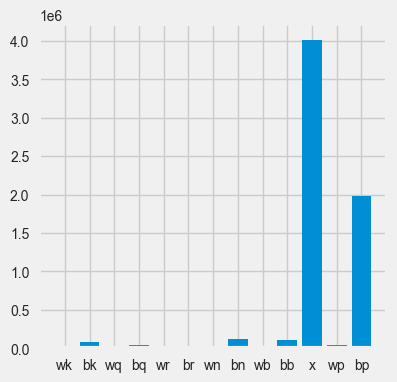

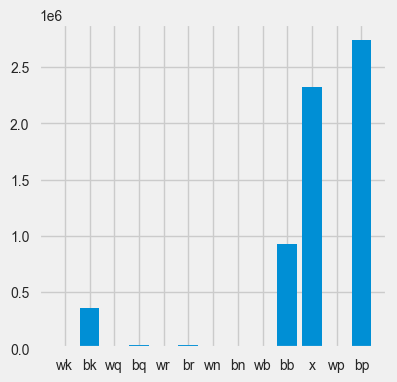

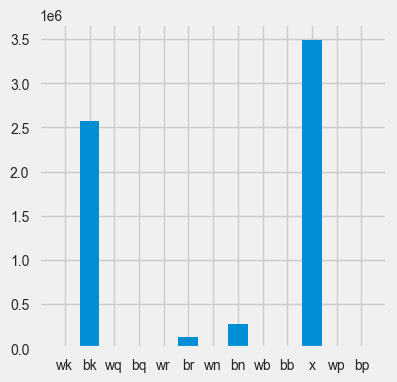

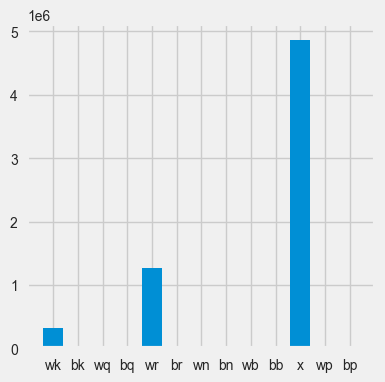

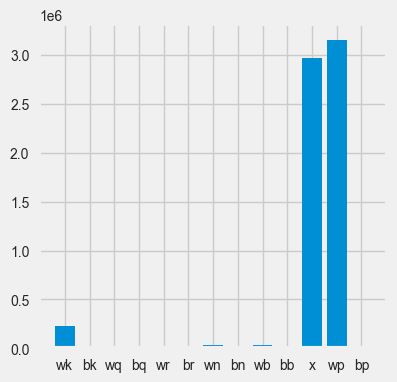

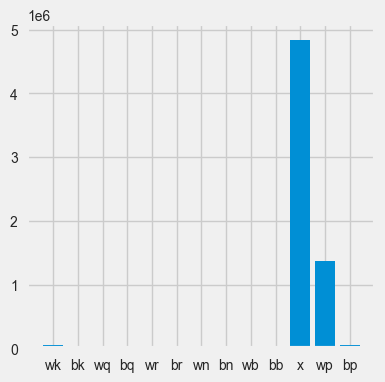

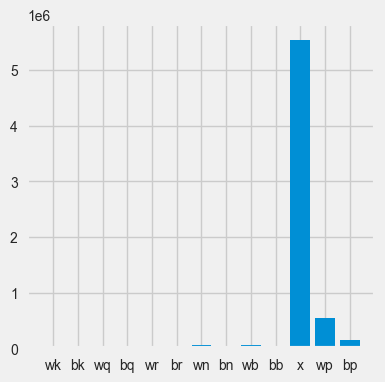

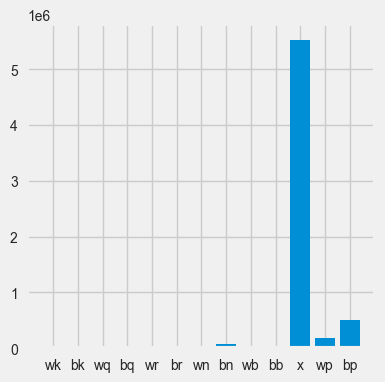

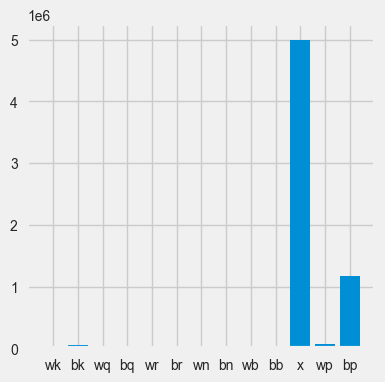

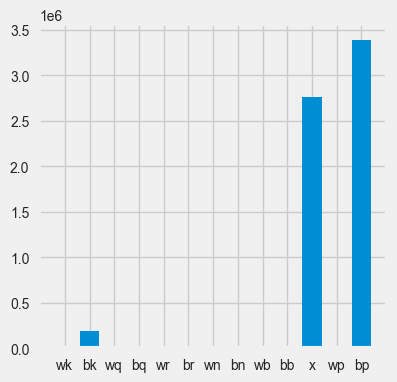

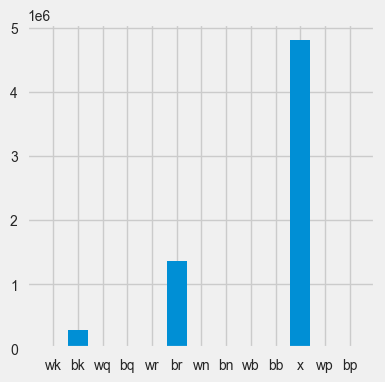

In [17]:
for square in SquareData.squares:
    fig,ax = plt.subplots(figsize=(4,4))
    ax.bar(df.index, df[square])
    plt.show()
    plt.close()

In [22]:
df.index = SquareData.occupants_pretty

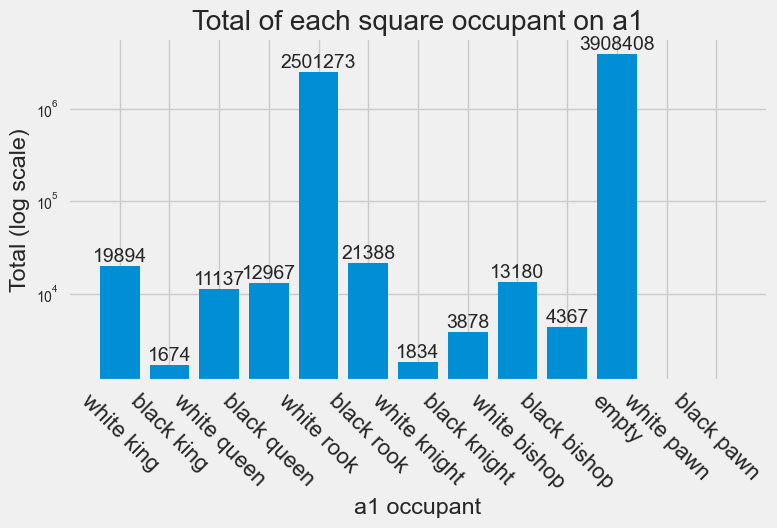

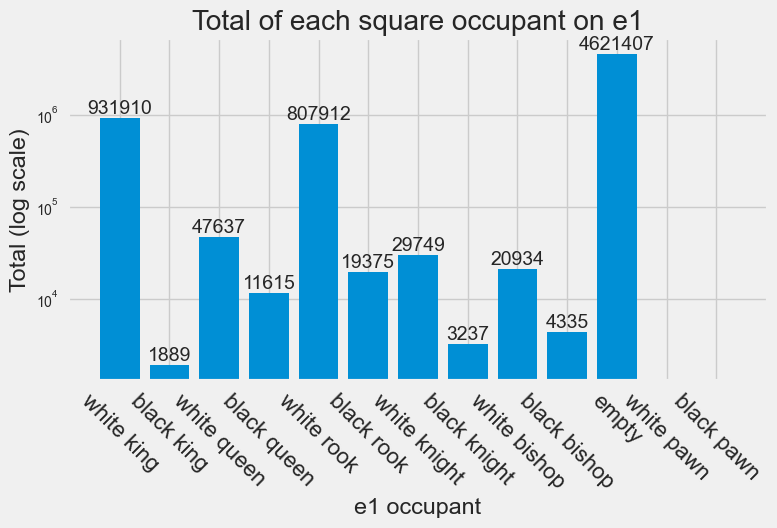

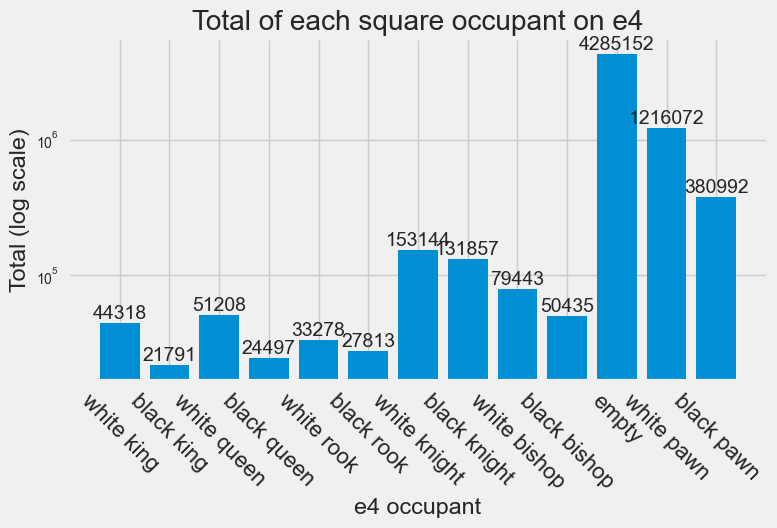

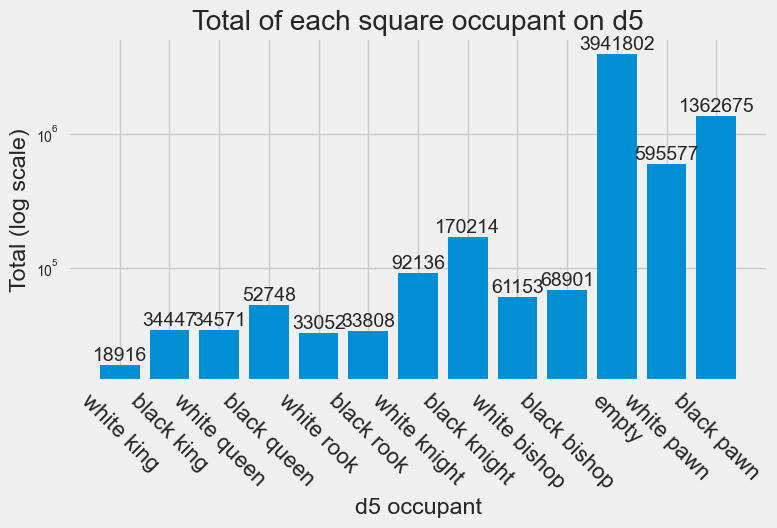

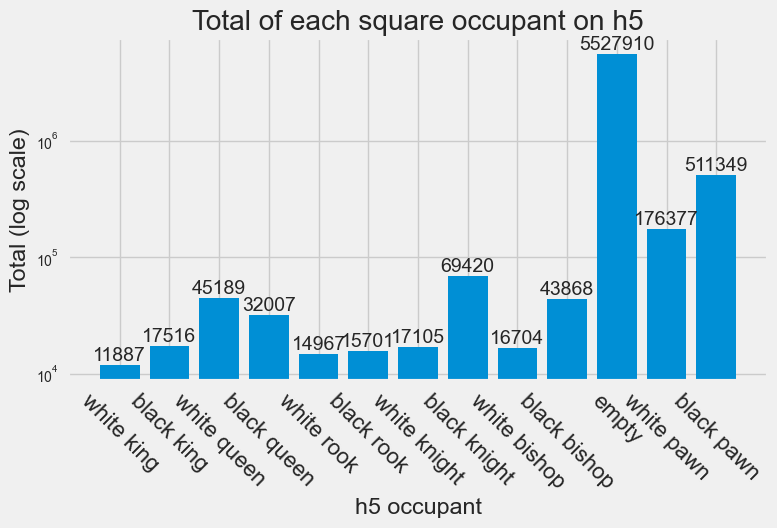

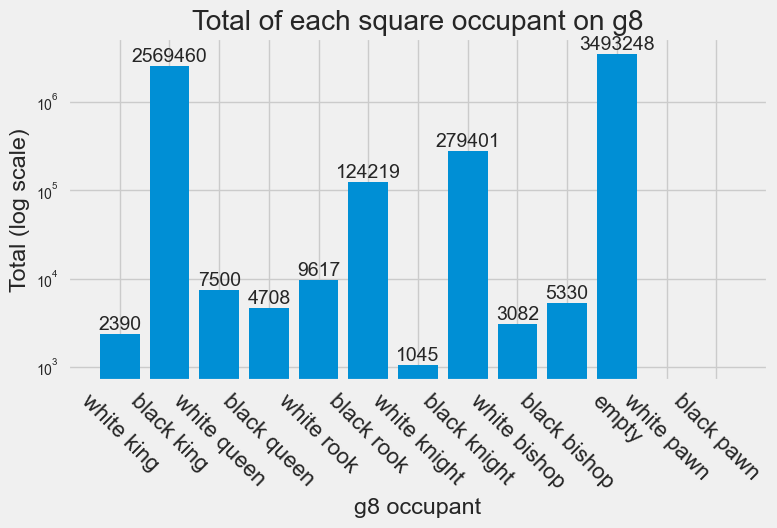

In [45]:
for square in ['a1','e1','e4','d5', 'h5', 'g8']:
    fig,ax = plt.subplots()
    plt.bar(df.index, df[square])
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
    plt.yscale('log')
    plt.xlabel(f'{square} occupant')
    plt.ylabel('Total (log scale)')
    plt.title(f'Total of each square occupant on {square}')
    plt.xticks(rotation=-45,size=16)
    plt.tight_layout()
    plt.savefig(f'./figs/total_occupants_all_{square}.pdf')

In [29]:
df2 = pd.read_csv('./board_states_trimmed_shuffled.csv')

In [30]:
df2

,a1,a2,a3,a4,a5,a6,a7,a8,b1,b2,...,g7,g8,h1,h2,h3,h4,h5,h6,h7,h8
0,wr,wp,x,wb,x,bp,x,br,wn,wp,...,bp,x,wk,bb,x,bq,x,x,bp,br
1,wr,x,wp,x,x,x,bp,x,x,wp,...,bb,x,wr,x,x,x,x,x,bp,br
2,x,wp,x,x,x,x,bp,x,x,wp,...,bp,bk,x,wp,x,x,x,x,bp,x
3,wr,x,x,wp,x,x,bp,x,x,x,...,x,x,x,wp,bb,x,bp,x,x,x
4,wr,wp,x,x,x,bp,x,x,x,wp,...,bp,x,x,wp,x,x,x,x,bp,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499995,x,wp,x,x,x,x,bp,x,x,wp,...,x,bk,x,x,x,bq,x,x,bp,x
6499996,wr,wp,x,x,x,x,bp,br,wn,wp,...,bp,x,wr,wp,x,x,x,x,bp,br
6499997,wr,wp,x,x,bp,x,x,br,x,wp,...,bp,x,wk,wp,x,x,x,x,bp,br
6499998,x,x,wp,x,x,x,bp,br,x,wb,...,x,bk,x,x,wb,x,bb,bp,x,x


In [32]:
total_pieces = (df2 != 'x').astype(int).sum(axis=1)
total_pieces.name = 'total_pieces'

In [33]:
total_pieces

0          25
1          30
2          18
3          25
4          26
           ..
6499995    19
6499996    32
6499997    22
6499998    29
6499999    18
Name: total_pieces, Length: 6500000, dtype: int64

In [35]:
total_pieces_df = pd.DataFrame(total_pieces).groupby(by='total_pieces').size()

In [41]:
total_pieces_df

total_pieces
2        360
3      17712
4      41159
5      59416
6      78268
7      93475
8     110113
9     125266
10    145906
11    157407
12    177064
13    190295
14    211563
15    215818
16    237918
17    231492
18    253865
19    239742
20    272995
21    247434
22    297190
23    252222
24    336022
25    244017
26    388923
27    222602
28    463207
29    182704
30    522862
31    103960
32    379023
dtype: int64

In [42]:
total_pieces.describe()

count    6.500000e+06
mean     2.109091e+01
std      7.397415e+00
min      2.000000e+00
25%      1.600000e+01
50%      2.200000e+01
75%      2.800000e+01
max      3.200000e+01
Name: total_pieces, dtype: float64

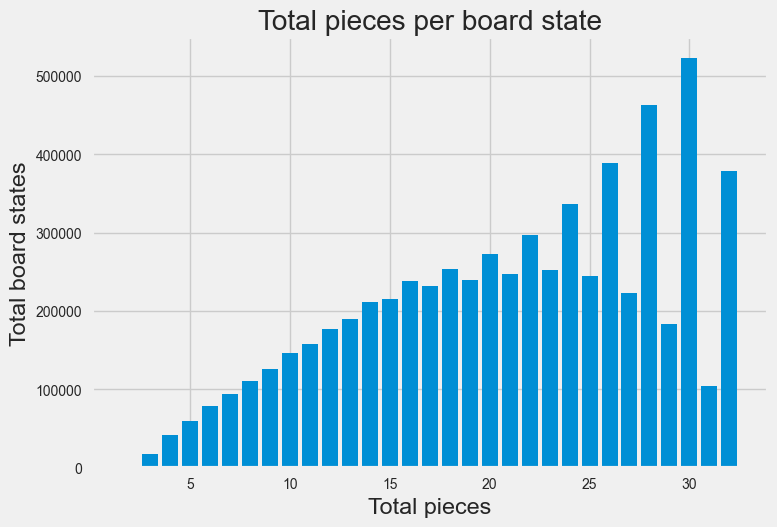

In [43]:
fig,ax=plt.subplots()
plt.bar(total_pieces_df.index,total_pieces_df)
plt.title('Total pieces per board state')
plt.ylabel('Total board states')
plt.xlabel('Total pieces')
#ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.tight_layout()
plt.savefig('./figs/total_pieces_all.pdf')